In [1]:
import matplotlib.pyplot as plt


import librosa
import librosa.display

import os
import glob
import numpy as np 
import IPython
import random

In [2]:
audio = "./blues.00001.wav"

data, sr = librosa.load(audio, sr=22050) # librosa.load(오디오 파일 경로, 샘플링 주파수)

# 음성 데이터 STFT 변환

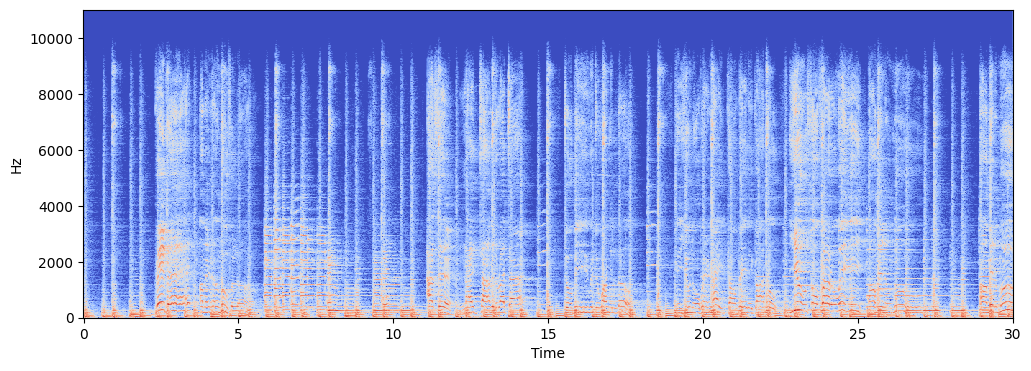

In [5]:
# 1. STFT 계산 
stft = librosa.stft(data)

# 2. STFT => dB로 변환
stft_db = librosa.amplitude_to_db(abs(stft))

# 3. STFT 이미지 저장 
plt.figure(figsize=(12,4))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
# plt.axis('off')
plt.savefig("./STFT_original.png", bbox_inches='tight', pad_inches=0)


## 0초 ~ 10초 구간 파형 추출하여 이미지 저장

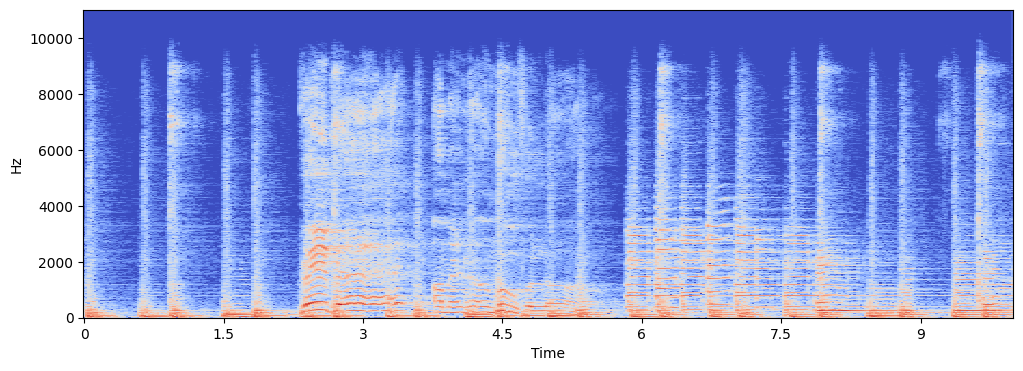

In [6]:
start_time= 0
end_time = 10
start_sample = sr * start_time
end_sample = sr * end_time
data_section_stft = data[start_sample : end_sample]


# 0초 ~ 10 구간 STFT 계산 
stft_temp = librosa.stft(data_section_stft)

# STFT -> db 로 변환
stft_db_temp = librosa.amplitude_to_db(abs(stft_temp))


# STFT 이미지 저장 
plt.figure(figsize=(12,4))
librosa.display.specshow(stft_db_temp, sr=sr, x_axis='time', y_axis='hz')
# plt.axis('off')
plt.savefig("./STFT_0-10.png", bbox_inches='tight', pad_inches=0)

## 0초 ~ 10초 STFT 노이즈 추가 

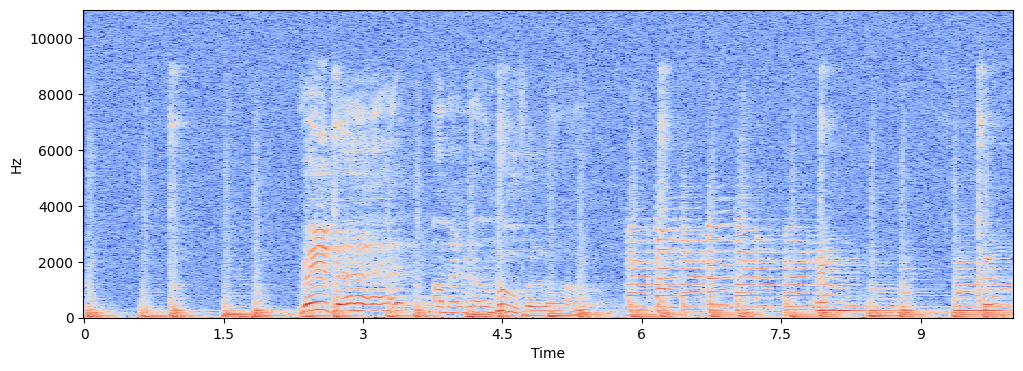

In [11]:
noise = 0.005 * np.random.randn(*data_section_stft.shape)
augmented_data_section = data_section_stft + noise

# STFT 계산
augmented_stft = librosa.stft(augmented_data_section)

# STFT 결과 -> dB로 변환 
augmented_stft_db = librosa.amplitude_to_db(abs(augmented_stft))

# 저장
plt.figure(figsize=(12,4))
librosa.display.specshow(augmented_stft_db, sr=sr, x_axis='time', y_axis='hz')
# plt.axis('off')
plt.savefig("./STFT_0-10_aug_noise.png", bbox_inches='tight', pad_inches=0)

## stretching 추가하여 이미지 저장


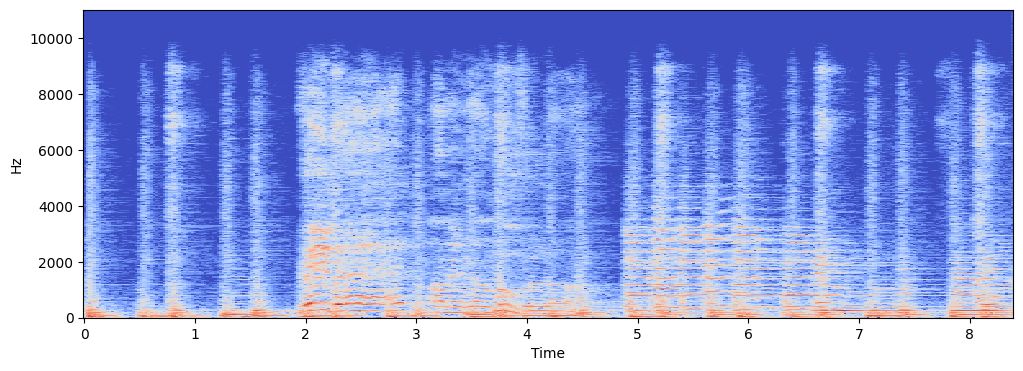

In [12]:
rate = 0.8 + np.random.random() * 0.4 # 0.8 ~ 1.2 사이의 랜덤한 비율 Time streching 
stretched_data_sction = librosa.effects.time_stretch(data_section_stft, rate=rate)

# STFT 계산
stretched_stft = librosa.stft(stretched_data_sction)

# STFT 결과 ===> dB로 변환 
stretched_stft_db = librosa.amplitude_to_db(abs(stretched_stft))

# 저장
plt.figure(figsize=(12,4))
librosa.display.specshow(stretched_stft_db, sr=sr, x_axis='time', y_axis='hz')
# plt.axis('off')
plt.savefig("./STFT_0-10_aug_stretch.png", bbox_inches='tight', pad_inches=0)